In [2]:
import sys

# 사이킷런 ≥0.20 필수
import sklearn

# 공통 모듈 임포트
import numpy as np
import pandas as pd
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import platform
from matplotlib import font_manager, rc

#매킨토시의 경우
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
#윈도우의 경우
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

mpl.rcParams['axes.unicode_minus'] = False

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "clustering"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

[[[0.09803922 0.11372549 0.00784314]
  [0.09411765 0.10980392 0.00392157]
  [0.09411765 0.11372549 0.        ]
  ...
  [0.22352941 0.4117647  0.08235294]
  [0.21960784 0.40392157 0.08627451]
  [0.20392157 0.3882353  0.07450981]]

 [[0.09411765 0.10980392 0.00392157]
  [0.09019608 0.10588235 0.        ]
  [0.09019608 0.10588235 0.        ]
  ...
  [0.23529412 0.42352942 0.08627451]
  [0.23137255 0.41568628 0.09803922]
  [0.21568628 0.4        0.08627451]]

 [[0.09019608 0.10588235 0.00784314]
  [0.08627451 0.10196079 0.00392157]
  [0.08627451 0.10196079 0.        ]
  ...
  [0.25882354 0.44705883 0.10980392]
  [0.24705882 0.43529412 0.10588235]
  [0.22745098 0.4117647  0.09411765]]

 ...

 [[0.05490196 0.07058824 0.00392157]
  [0.05490196 0.07058824 0.00392157]
  [0.05098039 0.07843138 0.00784314]
  ...
  [0.05098039 0.23921569 0.01176471]
  [0.03529412 0.21960784 0.00784314]
  [0.01960784 0.2        0.00784314]]

 [[0.05490196 0.07058824 0.00392157]
  [0.05490196 0.07058824 0.00392157]


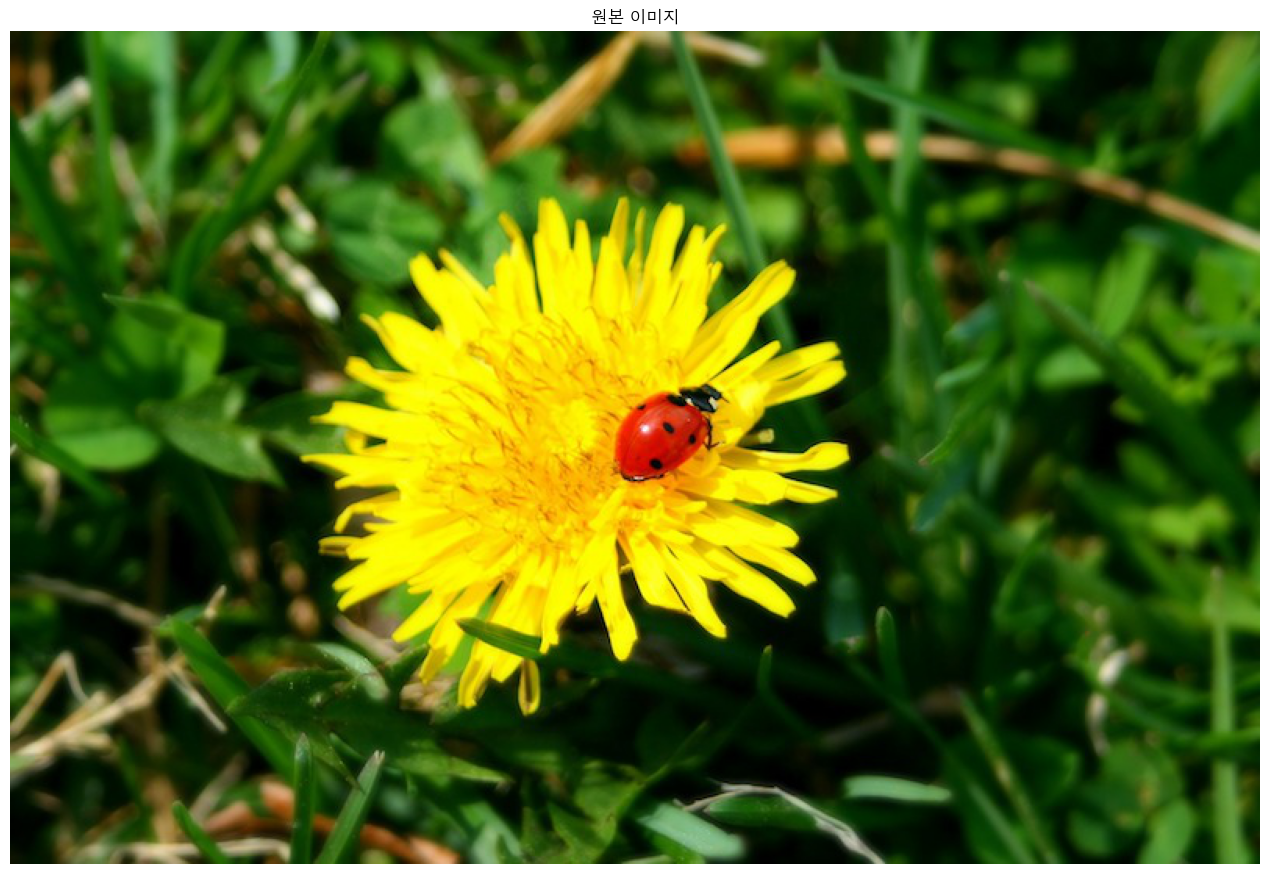

In [3]:
from matplotlib.image import imread
image= imread('../data/ladybug.png')
plt.figure(figsize=(50, 25))
plt.subplots_adjust(wspace=0.05, hspace=0.1)
plt.subplot(231)
plt.imshow(image)
plt.title('원본 이미지')
plt.axis('off')
print(image)


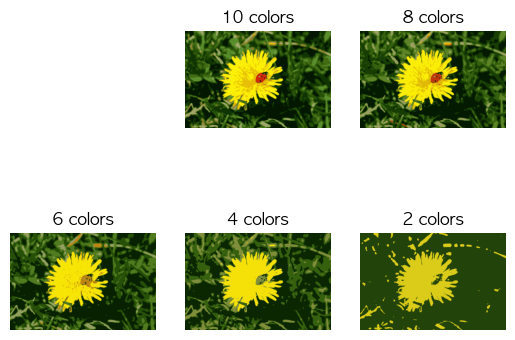

In [4]:
from sklearn.cluster import KMeans

X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

# print(segmented_img)

segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)

for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs. append(segmented_img.reshape(image.shape))

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

plt.show()

In [5]:
# 군집을 이용한 차원 축소 후 분류

# 8 * 8 zmrldml 
from sklearn.datasets import load_digits
#0 ~ 9까지의 8*8 크기 흑백 이미지 1,797 개
X_digits, y_digits = load_digits(return_X_y=True)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)
    

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [7]:
log_reg_score = log_reg.score(X_test, y_test)
print(log_reg_score)

0.9688888888888889


In [8]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('kmeans', KMeans(n_clusters=50, random_state=42)),
     ('log_reg', LogisticRegression(multi_class='ovr', solver='lbfgs',
                                    max_iter=5000, random_state=42))
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50, random_state=42)),
                ('log_reg',
                 LogisticRegression(max_iter=5000, multi_class='ovr',
                                    random_state=42))])

In [9]:
pipeline_score = pipeline.score(X_test, y_test)
print(pipeline_score)

0.9733333333333334


In [10]:
# # 최적의 클러스터 개수 찾기
# from sklearn.model_selection import GridSearchCV

# param_grid = dict(kmeans__n_clusters = range(2, 100))
# grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
# grid_clf.fit(X_train, y_train)

# 계층적 군집

In [13]:
# 병합 군집
np.random.seed(42)
variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']

X = np.random.random_sample([5, 3])*10
df = pd.DataFrame(X, columns=variables, index=labels)

df

,X,Y,Z
ID_0,3.745401,9.507143,7.319939
ID_1,5.986585,1.560186,1.559945
ID_2,0.580836,8.661761,6.011150
ID_3,7.080726,0.205845,9.699099
ID_4,8.324426,2.123391,1.818250


In [16]:
# 거리 계산
from scipy.spatial.distance import pdist, squareform

row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')),
                        columns=labels,
                        index=labels)
print(row_dist)

           ID_0       ID_1       ID_2       ID_3       ID_4
ID_0   0.000000  10.067500   3.527332  10.163608  10.283767
ID_1  10.067500   0.000000   9.973350   8.323293   2.418558
ID_2   3.527332   9.973350   0.000000  11.285037  10.967857
ID_3  10.163608   8.323293  11.285037   0.000000   8.205581
ID_4  10.283767   2.418558  10.967857   8.205581   0.000000


In [17]:
# 계층적 클러스터링 수행
from scipy.cluster.hierarchy import linkage

row_clusters = linkage(row_dist, method='complete')
pd.DataFrame(row_clusters,
            columns=['row label 1', 'row label 2','distance','no. of items in clust.'],
            index=['cluster %d' %(i+1) for i in range(row_clusters.shape[0])])
# 첫 번째와 두 번째는 병합된 클러스터 이름이고 세 번째는 거리, 네 번째는 아이템 개수.
# 클러스터 - 데이터 개수: 5개
# 1번 클러스터와 4번 클러스터를 합쳐서 5번 클러스터 생성 (데이터 2개)
# 0번 클러스터와 2번 클래스터를 합쳐서 6번 클러스터 생성 (데이터 2개)
# 3번 클러스터와 5번 클러스터를 합쳐서 7번 클래스터 생성 (데이터 3개)
# 6번 클러스터와 7번 클러스터를 합쳐서 8번 클래스터 생성 (데이터 5개)

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,1.0,4.0,3.570507,2.0
cluster 2,0.0,2.0,5.159321,2.0
cluster 3,3.0,5.0,13.182329,3.0
cluster 4,6.0,7.0,18.782841,5.0


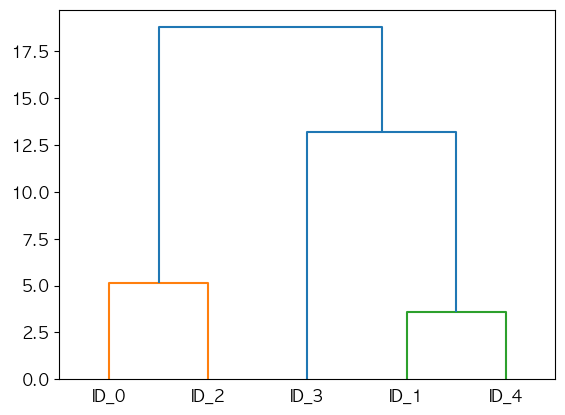

In [18]:
# 덴드로그램 출력
# 계층적 군집을 시각화 하는 도구
from scipy.cluster.hierarchy import dendrogram

row_dendr = dendrogram(row_clusters, labels=labels)
plt.show()


# Gaussian Mixture Model

In [21]:
from sklearn.datasets import make_blobs

# 샘플 데이터를 3개의 군집으로 묶기
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3, random_state=42)
gm.fit(X)


GaussianMixture(n_components=3, random_state=42)

In [22]:
# 중심점의 좌표 - gm.means
print(gm.means_)

[[ 0.05116693  0.07505701]
 [ 3.39839223  1.05935389]
 [-1.40763382  1.42705028]]


In [23]:
print(gm.predict_proba(X))

[[9.76660045e-01 2.33392754e-02 6.79713861e-07]
 [9.82749546e-01 1.65734903e-02 6.76963988e-04]
 [7.42959049e-05 2.04887015e-06 9.99923655e-01]
 ...
 [4.22276096e-07 9.99999578e-01 2.16925932e-26]
 [4.94998469e-16 1.00000000e+00 1.49550511e-41]
 [2.20699734e-15 1.00000000e+00 8.20533650e-41]]


In [ ]:
X_new, y_new = gm.sample(6)
X_new